## IMPORTING NECESSARY LIBRABRIES ##

In [15]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Loading Model ###

In [16]:
load_models = tf.keras.models.load_model('already_trained_model.keras') 

In [17]:
load_models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Visualize Single Image of Test Set ##

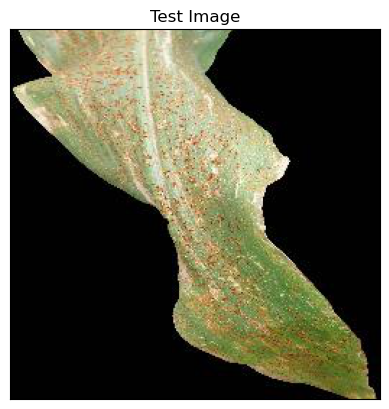

In [18]:
import cv2
image_path = 'test/CornCommonRust3.JPG'

# Read Image
image = cv2.imread(image_path)

# Convert to RGB Format
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Display Image
plt.imshow(image)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model ##

In [19]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size = (128, 128))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_array2 = np.array([input_array])
input_array2.shape

(1, 128, 128, 3)

In [20]:
prediction = load_models.predict(input_array2)
prediction, prediction.shape

2024-04-19 16:43:03.737476: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 272ms/step


(array([[1.8001922e-17, 2.2361136e-18, 2.4851550e-16, 4.5718844e-20,
         6.3695084e-19, 4.3016639e-18, 7.1257452e-23, 8.4102904e-14,
         1.0000000e+00, 8.6874875e-16, 1.6359945e-14, 2.4264402e-22,
         7.0511059e-18, 3.8066730e-19, 6.0270508e-21, 2.1390791e-16,
         2.4761167e-17, 2.8387706e-19, 3.8263150e-18, 4.2777724e-18,
         3.8433270e-11, 5.2194461e-19, 2.6125057e-19, 9.0036338e-22,
         8.8351778e-23, 1.2887484e-19, 5.4893780e-17, 6.1015597e-22,
         5.3849826e-20, 1.0294396e-15, 1.1391487e-08, 2.3842801e-21,
         1.9826897e-18, 4.2094797e-24, 1.6055000e-21, 8.1890921e-21,
         1.9741509e-21, 7.7995098e-17]], dtype=float32),
 (1, 38))

In [21]:
preds = load_models.predict(input_array2)[0] #predict probabilities

1/1 [==============================] - 0s 34ms/step


In [22]:
result_index = np.argmax(prediction)
result_index

8

In [23]:
result_index1 = np.argmax(preds)
result_index

8

In [24]:
class_name =['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

## Display result of disease prediction ##

In [25]:
# Get prediction probability for the predicted class
pred_probability = preds[result_index1] * 100  # Convert to percentage

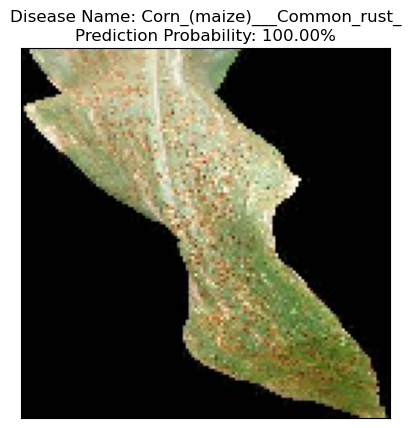

In [26]:
model_prediction = class_name[result_index]
model_prediction
plt.imshow(image)
plt.title(f'Disease Name: {model_prediction}\nPrediction Probability: {pred_probability:.2f}%')
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
model_prediction, pred_probability

('Corn_(maize)___Common_rust_', 100.0)